<a href="https://colab.research.google.com/github/Berskh/PDSProject/blob/main/PDS_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA CLEANING
 The following code removes missing values, handles outliers, and standardizes numerical features.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gdown
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [ ]:
#df = pd.read_csv('dataset.csv')

# URL of the file
file_url = "https://drive.google.com/uc?id=1q10tTWdyDKk7f12sKHYeOsfOl_N_Doac"

# Download the file using gdown
gdown.download(file_url, "downloaded_file.csv", quiet=False)

# Read the downloaded CSV file into a pandas DataFrame
df = pd.read_csv("downloaded_file.csv")  # Load data from downloaded_file.csv

df.head(2).T

Downloading...
From: https://drive.google.com/uc?id=1q10tTWdyDKk7f12sKHYeOsfOl_N_Doac
To: /content/downloaded_file.csv
100%|██████████| 471k/471k [00:00<00:00, 18.2MB/s]


,0,1
Marital status,1,1
Application mode,8,6
Application order,5,1
Course,2,11
Daytime/evening attendance,1,1
Previous qualification,1,1
Nacionality,1,1
Mother's qualification,13,1
Father's qualification,10,3
Mother's occupation,6,4


In [ ]:
df1 = df[[
    #'Marital status', 'Application mode', 'Application order', 'Course',
       #'Daytime/evening attendance', 'Previous qualification',
    #'Nacionality',
       #'Mother's qualification', 'Father's qualification',
       #'Mother's occupation', 'Father's occupation',
    'Displaced',
       #'Educational special needs',
    #'Debtor',
    #'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
    #'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)',
    #'Unemployment rate',
       #'Inflation rate', 'GDP',
    'Target']]

df1.shape

(4424, 17)

In [ ]:
summary = pd.DataFrame({
    'Null': df1.isna().sum(),
    'Dtype': df1.dtypes,
    'Unique': df1.apply(lambda x: ', '.join(map(str, x.dropna().unique())))
})

summary

,Null,Dtype,Unique
Displaced,0,int64,"1, 0"
Gender,0,int64,"1, 0"
Scholarship holder,0,int64,"0, 1"
Age at enrollment,0,int64,"20, 19, 45, 50, 18, 22, 21, 34, 37, 43, 55, 39..."
Curricular units 1st sem (credited),0,int64,"0, 2, 3, 6, 7, 13, 4, 1, 5, 19, 11, 8, 10, 9, ..."
Curricular units 1st sem (enrolled),0,int64,"0, 6, 5, 7, 8, 1, 12, 10, 18, 9, 21, 3, 17, 16..."
Curricular units 1st sem (evaluations),0,int64,"0, 6, 8, 9, 10, 5, 7, 14, 12, 15, 13, 11, 1, 1..."
Curricular units 1st sem (approved),0,int64,"0, 6, 5, 7, 4, 1, 3, 2, 8, 18, 10, 9, 21, 11, ..."
Curricular units 1st sem (grade),0,float64,"0.0, 14.0, 13.428571428571429, 12.333333333333..."
Curricular units 1st sem (without evaluations),0,int64,"0, 1, 2, 4, 3, 6, 12, 10, 7, 5, 8"


# EDA
The following code are the exploration to find the relationship of the dataset .

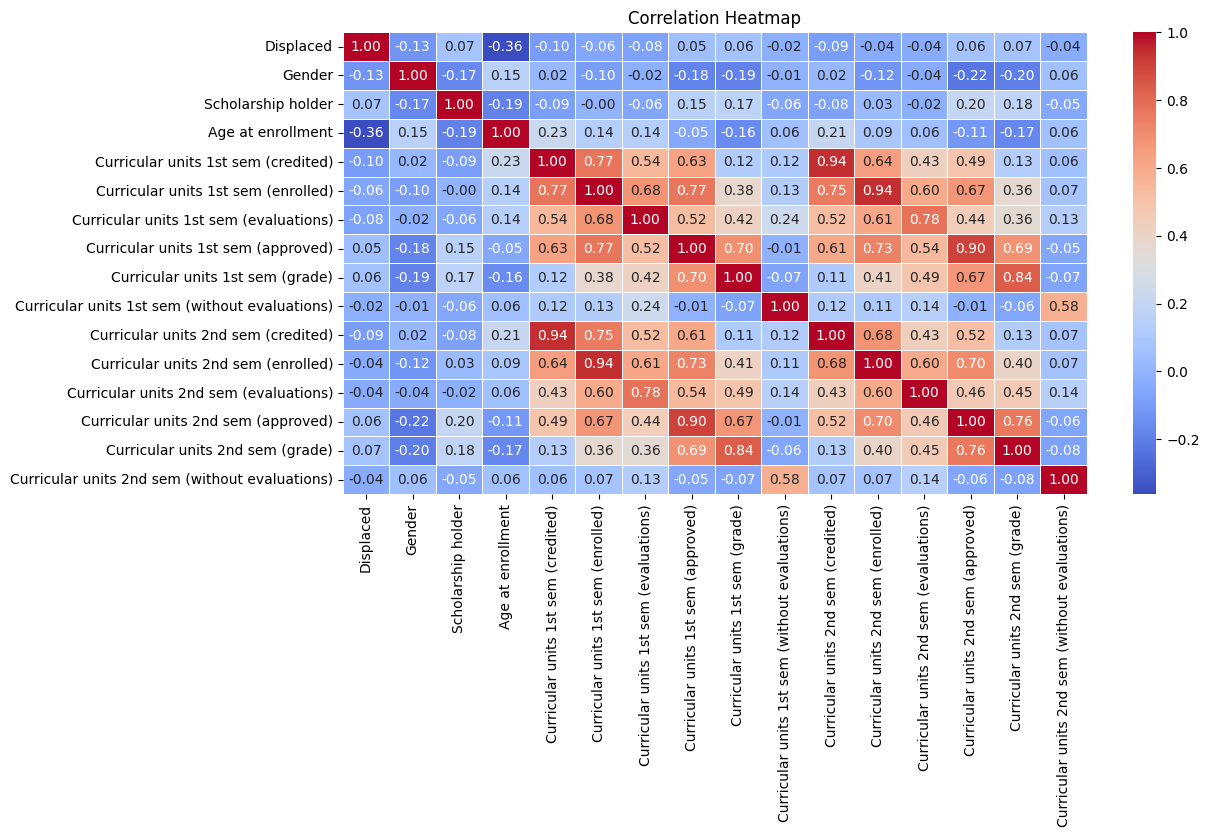

In [ ]:
# Select only numerical columns
numerical_df = df1.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

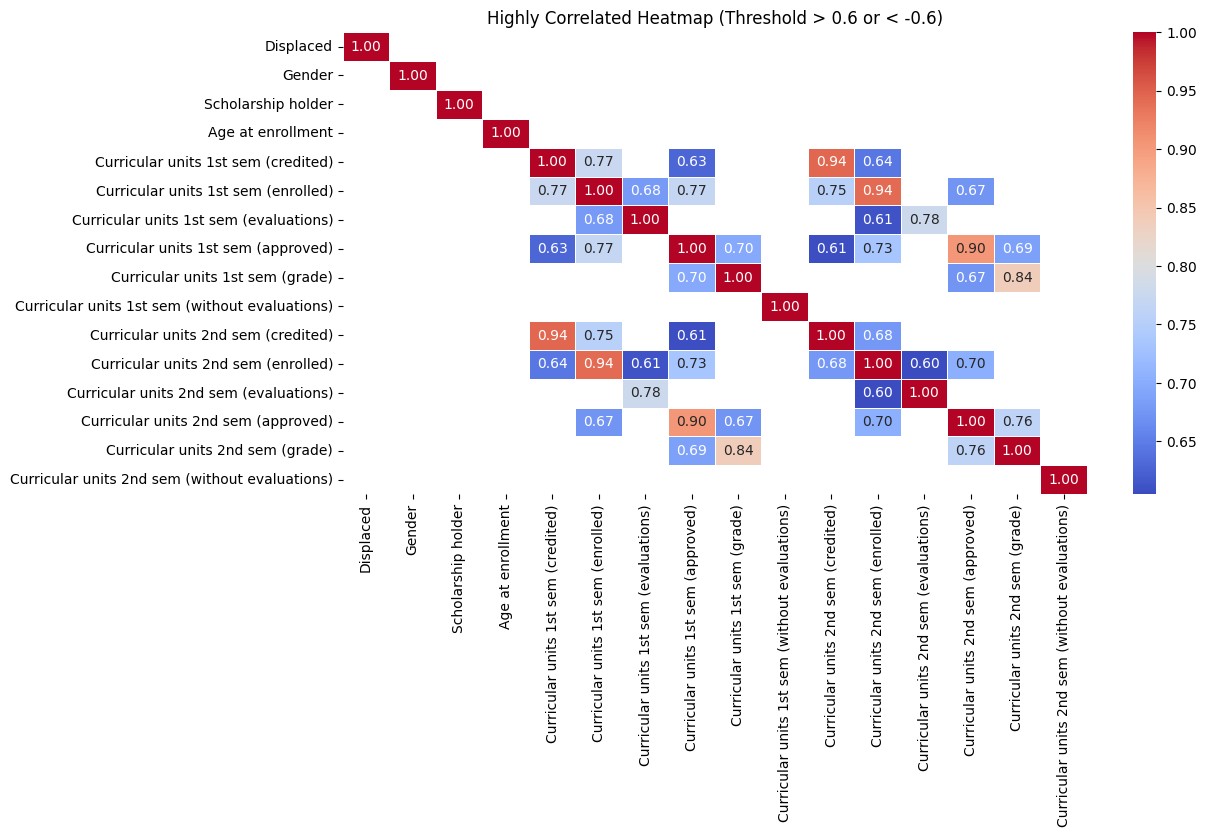

In [ ]:
# Set threshold
threshold = 0.6

# Mask to filter correlations above the threshold
mask = np.abs(correlation_matrix) < threshold
filtered_correlation_matrix = correlation_matrix.mask(mask)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Highly Correlated Heatmap (Threshold > 0.6 or < -0.6)')
plt.show()

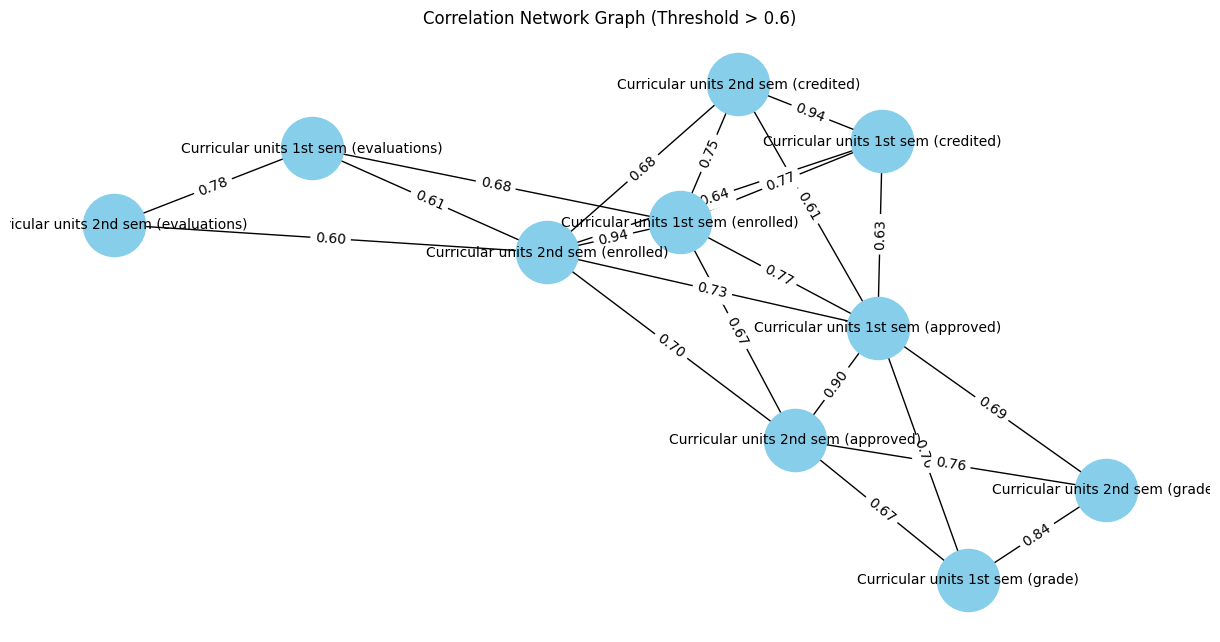

In [ ]:
import networkx as nx

# Build graph
G = nx.Graph()

# Add edges for high correlations
for i in correlation_matrix.columns:
    for j in correlation_matrix.columns:
        if i != j and abs(correlation_matrix.loc[i, j]) > threshold:
            G.add_edge(i, j, weight=correlation_matrix.loc[i, j])

# Draw the graph
plt.figure(figsize=(12, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in labels.items()})
plt.title('Correlation Network Graph (Threshold > 0.6)')
plt.show()

In [ ]:
# Create new features
df1['Performance Rate 1st sem'] = df1['Curricular units 1st sem (approved)'] / df1['Curricular units 1st sem (enrolled)'] #Performance
df1['Engagement Rate 1st sem'] = df1['Curricular units 1st sem (evaluations)'] / df1['Curricular units 1st sem (enrolled)'] #Engagement
df1['Credit Completion Rate 1st sem'] = df1['Curricular units 1st sem (credited)'] / df1['Curricular units 1st sem (enrolled)']

# Flag students at risk
df1['Low Performance Rate 1st sem'] = (df1['Performance Rate 1st sem'] < 0.5).astype(int)
df1['Low Engagement Rate 1st sem'] = (df1['Engagement Rate 1st sem'] < 0.7).astype(int)

# Review the dataset
df1.head(3)

,Displaced,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target,Performance Rate 1st sem,Engagement Rate 1st sem,Credit Completion Rate 1st sem,Low Performance Rate 1st sem,Low Engagement Rate 1st sem
0,1,1,0,20,0,0,0,0,0.0,0,0,0,0,0,0.000000,0,Dropout,NaN,NaN,NaN,0,0
1,1,1,0,19,0,6,6,6,14.0,0,0,6,6,6,13.666667,0,Graduate,1.0,1.0,0.0,0,0
2,1,1,0,19,0,6,0,0,0.0,0,0,6,0,0,0.000000,0,Dropout,0.0,0.0,0.0,1,1


# EDA2

In [ ]:
# Filter the records where 'Curricular units 1st sem (enrolled)' is 0
filtered_records = df1[df1['Curricular units 1st sem (enrolled)'] == 0]

# Display the filtered records
filtered_records

,Displaced,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target,Performance Rate 1st sem,Engagement Rate 1st sem,Credit Completion Rate 1st sem,Low Performance Rate 1st sem,Low Engagement Rate 1st sem
0,1,1,0,20,0,0,0,0,0.0,0,0,0,0,0,0.0,0,Dropout,NaN,NaN,NaN,0,0
20,0,0,1,21,0,0,0,0,0.0,0,0,0,0,0,0.0,0,Graduate,NaN,NaN,NaN,0,0
59,1,0,0,18,0,0,0,0,0.0,0,0,0,0,0,0.0,0,Enrolled,NaN,NaN,NaN,0,0
62,1,1,1,19,0,0,0,0,0.0,0,0,0,0,0,0.0,0,Enrolled,NaN,NaN,NaN,0,0
66,1,1,1,19,0,0,0,0,0.0,0,0,0,0,0,0.0,0,Graduate,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4308,0,1,0,19,0,0,0,0,0.0,0,0,0,0,0,0.0,0,Dropout,NaN,NaN,NaN,0,0
4331,1,0,0,23,0,0,0,0,0.0,0,0,0,0,0,0.0,0,Dropout,NaN,NaN,NaN,0,0
4353,1,0,0,18,0,0,0,0,0.0,0,0,0,0,0,0.0,0,Graduate,NaN,NaN,NaN,0,0
4365,1,1,0,19,0,0,0,0,0.0,0,0,0,0,0,0.0,0,Graduate,NaN,NaN,NaN,0,0


In [ ]:
df1.drop(df1[df1['Curricular units 1st sem (enrolled)'] == 0].index, inplace=True)

In [ ]:
df1.isna().sum()

,0
Displaced,0
Gender,0
Scholarship holder,0
Age at enrollment,0
Curricular units 1st sem (credited),0
Curricular units 1st sem (enrolled),0
Curricular units 1st sem (evaluations),0
Curricular units 1st sem (approved),0
Curricular units 1st sem (grade),0
Curricular units 1st sem (without evaluations),0


In [ ]:
 df1.head(3)

,Displaced,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target,Performance Rate 1st sem,Engagement Rate 1st sem,Credit Completion Rate 1st sem,Low Performance Rate 1st sem,Low Engagement Rate 1st sem
1,1,1,0,19,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,Graduate,1.0,1.000000,0.0,0,0
2,1,1,0,19,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,Dropout,0.0,0.000000,0.0,1,1
3,1,0,0,20,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,Graduate,1.0,1.333333,0.0,0,0


# TRANSFORM
This code snippet focuses on creating new features from existing data specifically related to the students' performance in their second semester. It then uses these new features to identify students who might be at risk.

In [ ]:
# Create new features
df1['Performance Rate 2nd Sem'] = df1['Curricular units 2nd sem (approved)'] / df1['Curricular units 2nd sem (enrolled)'] #Performance
df1['Engagement Rate 2nd Sem'] = df1['Curricular units 2nd sem (evaluations)'] / df1['Curricular units 2nd sem (enrolled)'] #Engagement
df1['Credit Completion Rate 2nd Sem'] = df1['Curricular units 2nd sem (credited)'] / df1['Curricular units 2nd sem (enrolled)']

# Flag students at risk
df1['Low Performance Rate 2nd Sem'] = (df1['Performance Rate 2nd Sem'] < 0.5).astype(int)
df1['Low Engagement Rate 2nd Sem'] = (df1['Engagement Rate 2nd Sem'] < 0.7).astype(int)

# Review the dataset
df1.head(3)

,Displaced,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target,Performance Rate 1st sem,Engagement Rate 1st sem,Credit Completion Rate 1st sem,Low Performance Rate 1st sem,Low Engagement Rate 1st sem,Performance Rate 2nd Sem,Engagement Rate 2nd Sem,Credit Completion Rate 2nd Sem,Low Performance Rate 2nd Sem,Low Engagement Rate 2nd Sem
1,1,1,0,19,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,Graduate,1.0,1.000000,0.0,0,0,1.000000,1.000000,0.0,0,0
2,1,1,0,19,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,Dropout,0.0,0.000000,0.0,1,1,0.000000,0.000000,0.0,1,1
3,1,0,0,20,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,Graduate,1.0,1.333333,0.0,0,0,0.833333,1.666667,0.0,0,0


# NORMALIZATION
This code aims to normalize the numerical features in the dataset df1 using a technique called Min-Max scaling.

In [ ]:
# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)',
       'Performance Rate 1st sem', 'Engagement Rate 1st sem',
       'Credit Completion Rate 1st sem', 'Performance Rate 2nd Sem',
       'Engagement Rate 2nd Sem', 'Credit Completion Rate 2nd Sem']

scaler = MinMaxScaler()
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

df1.head(3)

,Displaced,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target,Performance Rate 1st sem,Engagement Rate 1st sem,Credit Completion Rate 1st sem,Low Performance Rate 1st sem,Low Engagement Rate 1st sem,Performance Rate 2nd Sem,Engagement Rate 2nd Sem,Credit Completion Rate 2nd Sem,Low Performance Rate 2nd Sem,Low Engagement Rate 2nd Sem
1,1,1,0,0.037736,0.0,0.2,0.133333,0.230769,0.741722,0.0,0.0,0.227273,0.181818,0.30,0.735897,0.0,Graduate,1.0,0.285714,0.0,0,0,1.000000,0.260870,0.0,0,0
2,1,1,0,0.037736,0.0,0.2,0.000000,0.000000,0.000000,0.0,0.0,0.227273,0.000000,0.00,0.000000,0.0,Dropout,0.0,0.000000,0.0,1,1,0.000000,0.000000,0.0,1,1
3,1,0,0,0.056604,0.0,0.2,0.177778,0.230769,0.711447,0.0,0.0,0.227273,0.303030,0.25,0.667692,0.0,Graduate,1.0,0.380952,0.0,0,0,0.833333,0.434783,0.0,0,0


In [ ]:
df1.describe()

,Displaced,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Performance Rate 1st sem,Engagement Rate 1st sem,Credit Completion Rate 1st sem,Low Performance Rate 1st sem,Low Engagement Rate 1st sem,Performance Rate 2nd Sem,Engagement Rate 2nd Sem,Credit Completion Rate 2nd Sem,Low Performance Rate 2nd Sem,Low Engagement Rate 2nd Sem
count,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000
mean,0.537465,0.342837,0.248586,0.120712,0.037005,0.221461,0.192245,0.188701,0.587662,0.011958,0.029726,0.249839,0.254705,0.231197,0.574221,0.013058,0.727484,0.384305,0.067068,0.199811,0.039821,0.688364,0.342933,0.054911,0.243638,0.052074
std,0.498653,0.474713,0.432244,0.144982,0.120271,0.086472,0.086524,0.115390,0.233649,0.058732,0.102921,0.082687,0.110813,0.146665,0.262006,0.064079,0.342821,0.146211,0.187666,0.399906,0.195561,0.365513,0.137945,0.165925,0.429327,0.222201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.037736,0.000000,0.200000,0.155556,0.115385,0.596026,0.000000,0.000000,0.181818,0.181818,0.150000,0.592308,0.000000,0.600000,0.285714,0.000000,0.000000,0.000000,0.500000,0.260870,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.056604,0.000000,0.200000,0.177778,0.192308,0.653422,0.000000,0.000000,0.227273,0.242424,0.250000,0.664103,0.000000,0.857143,0.352295,0.000000,0.000000,0.000000,0.833333,0.313043,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.150943,0.000000,0.240000,0.222222,0.230769,0.711447,0.000000,0.000000,0.272727,0.303030,0.300000,0.722419,0.000000,1.000000,0.457143,0.000000,0.000000,0.000000,1.000000,0.417391,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# FILTERING

In [ ]:
# Filter dataset to include only Dropout and Graduate
df1_DropOut_Graduate = df1[df1['Target'].isin(['Dropout', 'Graduate'])]
df1_DropOut_Graduate.head(3)

,Displaced,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target,Performance Rate 1st sem,Engagement Rate 1st sem,Credit Completion Rate 1st sem,Low Performance Rate 1st sem,Low Engagement Rate 1st sem,Performance Rate 2nd Sem,Engagement Rate 2nd Sem,Credit Completion Rate 2nd Sem,Low Performance Rate 2nd Sem,Low Engagement Rate 2nd Sem
1,1,1,0,0.037736,0.0,0.2,0.133333,0.230769,0.741722,0.0,0.0,0.227273,0.181818,0.30,0.735897,0.0,Graduate,1.0,0.285714,0.0,0,0,1.000000,0.260870,0.0,0,0
2,1,1,0,0.037736,0.0,0.2,0.000000,0.000000,0.000000,0.0,0.0,0.227273,0.000000,0.00,0.000000,0.0,Dropout,0.0,0.000000,0.0,1,1,0.000000,0.000000,0.0,1,1
3,1,0,0,0.056604,0.0,0.2,0.177778,0.230769,0.711447,0.0,0.0,0.227273,0.303030,0.25,0.667692,0.0,Graduate,1.0,0.380952,0.0,0,0,0.833333,0.434783,0.0,0,0


In [ ]:
import pandas as pd
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Ensure the directory exists
output_dir = '/content/drive/MyDrive/group_wqd7001'
os.makedirs(output_dir, exist_ok=True)

# Define the output file path
output_file = os.path.join(output_dir, 'cleaned_data.csv')

# Save the DataFrame to CSV
df1.to_csv(output_file, index=False)

print(f"Cleaned data saved to: {output_file}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cleaned data saved to: /content/drive/MyDrive/group_wqd7001/cleaned_data.csv


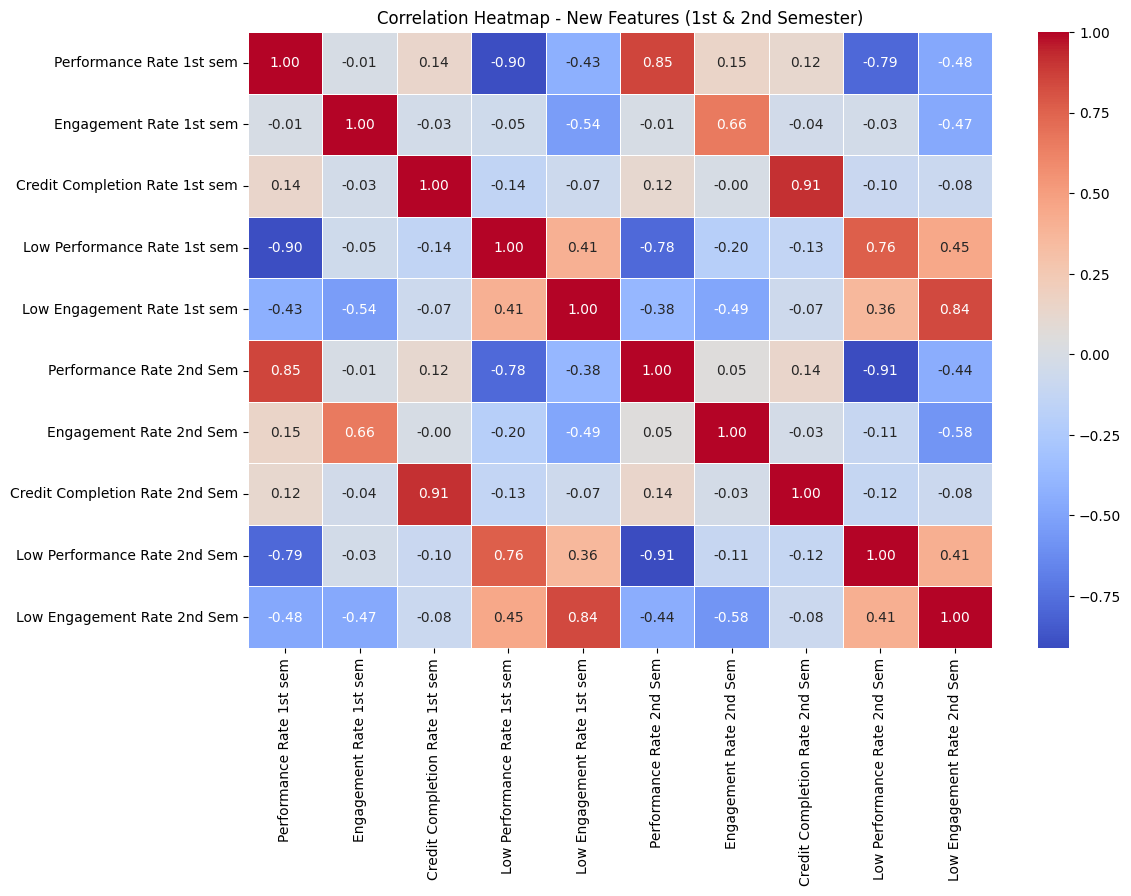

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is defined and the new features for both semesters are created

# Select new features for 1st semester
new_features_1st_sem = ['Performance Rate 1st sem', 'Engagement Rate 1st sem',
                       'Credit Completion Rate 1st sem', 'Low Performance Rate 1st sem',
                       'Low Engagement Rate 1st sem']

# Select new features for 2nd semester
new_features_2nd_sem = ['Performance Rate 2nd Sem', 'Engagement Rate 2nd Sem',
                       'Credit Completion Rate 2nd Sem', 'Low Performance Rate 2nd Sem',
                       'Low Engagement Rate 2nd Sem']

# Combine all new features
all_new_features = new_features_1st_sem + new_features_2nd_sem

# Create a subset DataFrame with all new features
new_features_df = df1[all_new_features]

# Calculate the correlation matrix for all new features
correlation_matrix_new = new_features_df.corr()

# Plot the heatmap for all new features
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap - New Features (1st & 2nd Semester)')
plt.show()

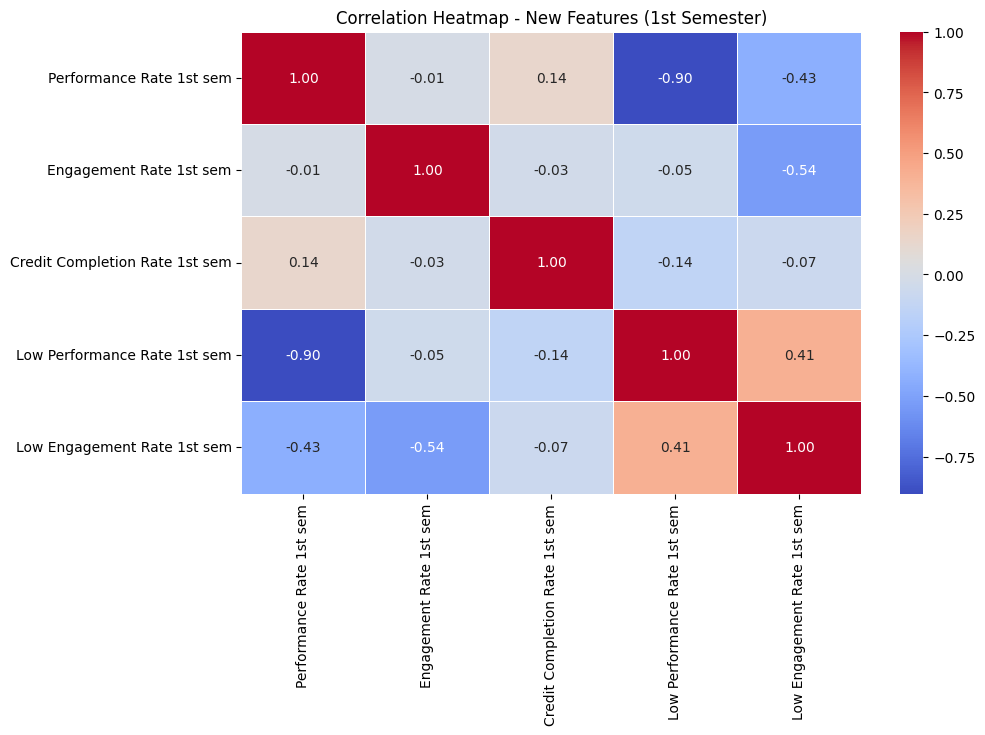

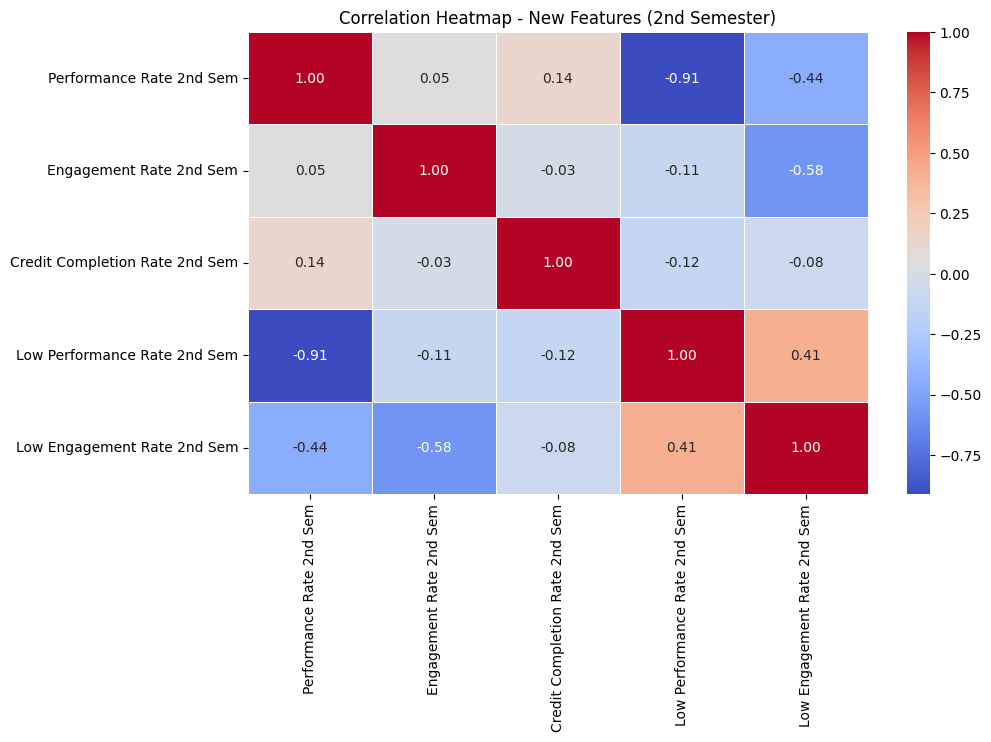

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is defined and the new features for both semesters are created

# Select new features for 1st semester
new_features_1st_sem = ['Performance Rate 1st sem', 'Engagement Rate 1st sem',
                       'Credit Completion Rate 1st sem', 'Low Performance Rate 1st sem',
                       'Low Engagement Rate 1st sem']

# Select new features for 2nd semester
new_features_2nd_sem = ['Performance Rate 2nd Sem', 'Engagement Rate 2nd Sem',
                       'Credit Completion Rate 2nd Sem', 'Low Performance Rate 2nd Sem',
                       'Low Engagement Rate 2nd Sem']

# Create a subset DataFrame with only the new features for 1st semester
new_features_df_1st = df1[new_features_1st_sem]

# Calculate the correlation matrix for the new features for 1st semester
correlation_matrix_new_1st = new_features_df_1st.corr()

# Plot the heatmap for the new features for 1st semester
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.heatmap(correlation_matrix_new_1st, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap - New Features (1st Semester)')
plt.show()


# Create a subset DataFrame with only the new features for 2nd semester
new_features_df_2nd = df1[new_features_2nd_sem]

# Calculate the correlation matrix for the new features for 2nd semester
correlation_matrix_new_2nd = new_features_df_2nd.corr()

# Plot the heatmap for the new features for 2nd semester
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.heatmap(correlation_matrix_new_2nd, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap - New Features (2nd Semester)')
plt.show()

#Modelling


In [ ]:
# Encode Target to Dropout = 1, Graduate = 0 for Modelling
df1_DropOut_Graduate['Target'] = df1_DropOut_Graduate['Target'].map({'Dropout': 1, 'Graduate': 0})
df1_DropOut_Graduate.head(3)

,Displaced,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target,Performance Rate 1st sem,Engagement Rate 1st sem,Credit Completion Rate 1st sem,Low Performance Rate 1st sem,Low Engagement Rate 1st sem,Performance Rate 2nd Sem,Engagement Rate 2nd Sem,Credit Completion Rate 2nd Sem,Low Performance Rate 2nd Sem,Low Engagement Rate 2nd Sem
1,1,1,0,0.037736,0.0,0.2,0.133333,0.230769,0.741722,0.0,0.0,0.227273,0.181818,0.30,0.735897,0.0,0,1.0,0.285714,0.0,0,0,1.000000,0.260870,0.0,0,0
2,1,1,0,0.037736,0.0,0.2,0.000000,0.000000,0.000000,0.0,0.0,0.227273,0.000000,0.00,0.000000,0.0,1,0.0,0.000000,0.0,1,1,0.000000,0.000000,0.0,1,1
3,1,0,0,0.056604,0.0,0.2,0.177778,0.230769,0.711447,0.0,0.0,0.227273,0.303030,0.25,0.667692,0.0,0,1.0,0.380952,0.0,0,0,0.833333,0.434783,0.0,0,0


In [ ]:
# Define features (X) and target (y)
X = df1_DropOut_Graduate.drop('Target', axis=1)
y = df1_DropOut_Graduate['Target']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict using Logistic Regression
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

In [ ]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict using Decision Tree
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

In [ ]:
# Train Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [ ]:
# Train XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict using XGBoost
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

Evaluation of Models

* Precision
* Recall
* F1-Score
* ROC-AUC

and Feature Importance in Random Forest


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       427
           1       0.92      0.86      0.89       269

    accuracy                           0.92       696
   macro avg       0.92      0.91      0.91       696
weighted avg       0.92      0.92      0.92       696

Logistic Regression ROC-AUC: 0.96


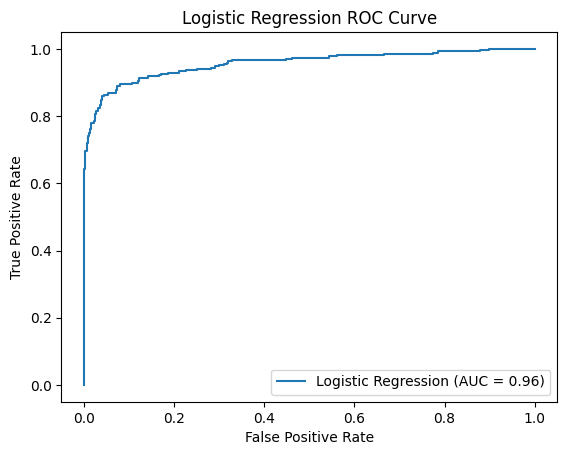


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       427
           1       0.86      0.87      0.86       269

    accuracy                           0.89       696
   macro avg       0.89      0.89      0.89       696
weighted avg       0.89      0.89      0.89       696

Decision Tree ROC-AUC: 0.89


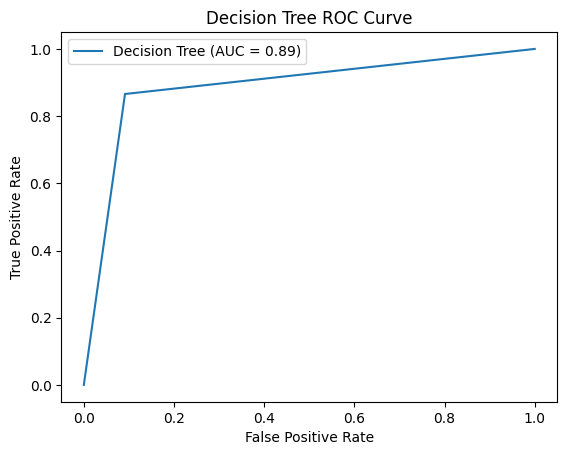


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       427
           1       0.92      0.84      0.88       269

    accuracy                           0.91       696
   macro avg       0.91      0.90      0.90       696
weighted avg       0.91      0.91      0.91       696

Random Forest ROC-AUC: 0.95


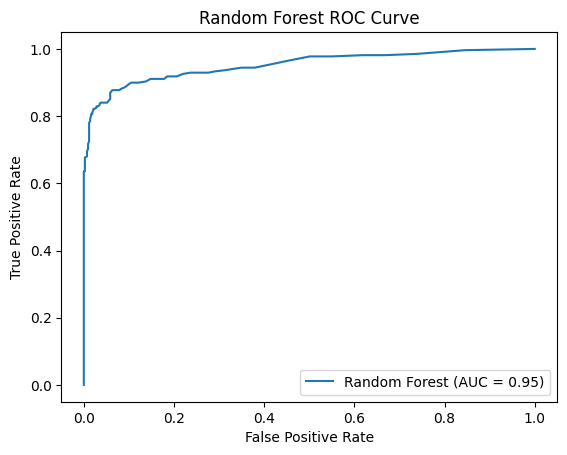


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       427
           1       0.87      0.85      0.86       269

    accuracy                           0.89       696
   macro avg       0.89      0.89      0.89       696
weighted avg       0.89      0.89      0.89       696

XGBoost ROC-AUC: 0.94


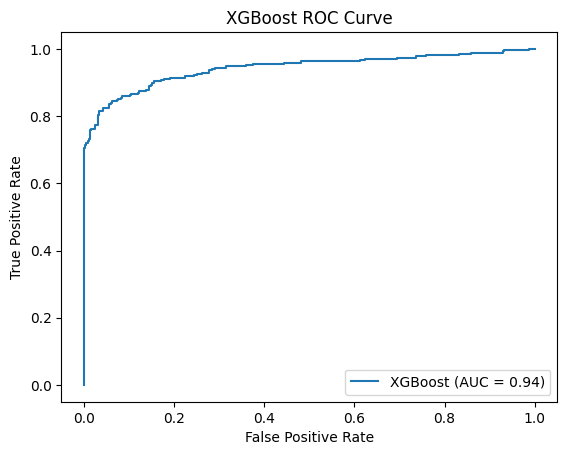

In [ ]:
# Evaluate Models
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluation Function
def evaluate_model(name, y_test, y_pred, y_prob):
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"{name} ROC-AUC: {roc_auc:.2f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend()
    plt.show()

# Evaluate All Models
evaluate_model("Logistic Regression", y_test, y_pred_log, y_prob_log)
evaluate_model("Decision Tree", y_test, y_pred_dt, y_prob_dt)
evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb, y_prob_xgb)

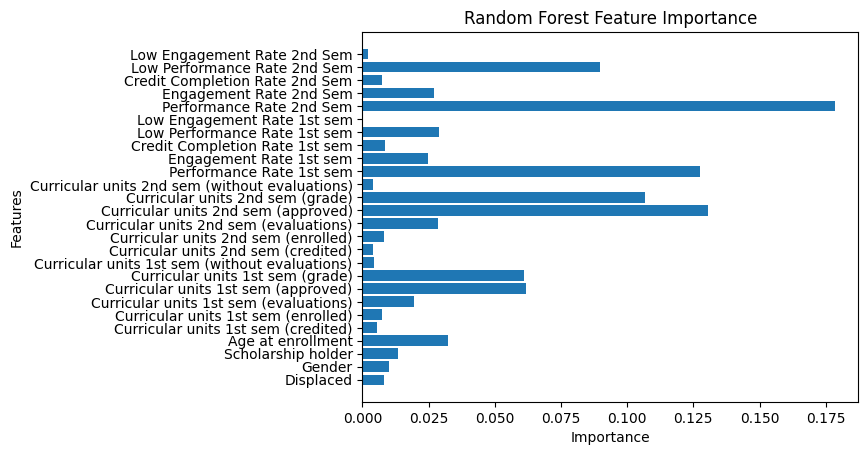

In [ ]:
# Feature Importance for Random Forest
importances = rf.feature_importances_
features = X.columns

# Plot Feature Importance
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
# WIP: to trigger an email when student low perfoance and low engagement, and predicted to dropout

import smtplib
from email.mime.text import MIMEText

def send_email_alert(student_id, probability):
    # Email configuration
    sender_email = "your_email@gmail.com"  # Replace with your email
    sender_password = "your_password"  # Replace with your email password
    receiver_email = "recipient_email@example.com"  # Replace with recipient email

    # Email content
    msg = MIMEText(f"Student {student_id} has a high probability of dropout ({probability:.2%}).")
    msg["Subject"] = "Dropout Risk Alert"
    msg["From"] = sender_email
    msg["To"] = receiver_email

    # Send the email
    with smtplib.SMTP_SSL("smtp.gmail.com", 465) as smtp:  # For Gmail
        smtp.login(sender_email, sender_password)
        smtp.send_message(msg)

# Example usage within your prediction loop:
# ... (your existing code)

# Assuming 'y_prob_rf' is the probability from the RandomForest model
for index, probability in enumerate(y_prob_rf):
    if probability > 0.7: # Example threshold, you can adjust this
        student_id = X_test.index[index] # Assuming index is student ID. Replace if needed.
        send_email_alert(student_id, probability)

# ... (rest of your code)

SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. For more information, go to\n5.7.8  https://support.google.com/mail/?p=BadCredentials d2e1a72fcca58-72aad8dbbb6sm18695541b3a.95 - gsmtp')